# Library imports

In [1]:
from collections import defaultdict, Counter
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer #pip install yellowbrick
import pandas as pd  
import pylab as plt
import numpy as np
import seaborn as sns

In [2]:
#The link to read in the data from
file_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
breastcancer = pd.read_csv(file_link, header = None)
headers = ['Scn', 'A2',  'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'CLASS']
breastcancer.columns = headers
breastcancer.replace('?', np.NaN, inplace = True) 
breastcancer["A7"] = pd.to_numeric(breastcancer["A7"])
breastcancer['A7'].fillna((breastcancer['A7'].mean()), inplace=True)

In [3]:
breastcancer.drop(['Scn', 'CLASS'], axis=1, inplace = True)

In [4]:
breastcancer

,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,5,1,1,1,2,1.000000,3,1,1
1,5,4,4,5,7,10.000000,3,2,1
2,3,1,1,1,2,2.000000,3,1,1
3,6,8,8,1,3,4.000000,3,7,1
4,4,1,1,3,2,1.000000,3,1,1
5,8,10,10,8,7,10.000000,9,7,1
6,1,1,1,1,2,10.000000,3,1,1
7,2,1,2,1,2,1.000000,3,1,1
8,2,1,1,1,2,1.000000,1,1,5
9,4,2,1,1,2,1.000000,2,1,1


In [5]:

kmeans = KMeans(n_clusters=4)
kmeans.fit(breastcancer)
y_kmeans = kmeans.predict(breastcancer)

In [6]:
centers = kmeans.cluster_centers_

# Print centroids - you should have a matrix with 4 row (4 clusters) and 9  columns (for each A column)

In [7]:
centers

array([[7.46478873, 7.02816901, 6.67605634, 4.1971831 , 5.53521127,
        3.45322005, 5.38028169, 6.81690141, 2.30985915],
       [7.23404255, 4.85106383, 5.04255319, 4.86170213, 4.11702128,
        9.38297872, 5.26595745, 3.78723404, 1.64893617],
       [2.94493392, 1.24449339, 1.36563877, 1.29295154, 2.03964758,
        1.3514006 , 2.06167401, 1.20044053, 1.07709251],
       [6.7625    , 8.3875    , 8.425     , 7.75      , 6.775     ,
        9.2125    , 7.375     , 7.7375    , 3.7875    ]])

# Find the optimal number of clusters


In [8]:
inertias = []
kranges = range(1, 16)

for num_clusters in range(1, 16):

    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(breastcancer)
    y_kmeans = kmeans.predict(breastcancer)
    inertias.append(kmeans.inertia_)
    

In [9]:
inertias

[49078.827192998986,
 19694.977242129746,
 16599.3563845307,
 15019.505116411576,
 13967.499354971076,
 13091.80653256939,
 12400.960192008477,
 11597.106043935193,
 11054.710798788085,
 10474.264272465065,
 10177.646345151446,
 9893.462779289614,
 9428.549272834758,
 9314.185859935917,
 9135.100027414326]

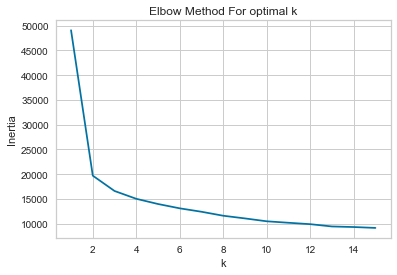

In [10]:
plt.plot(kranges, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For optimal k')
plt.show()

# Another library to find the optimum number of clusters

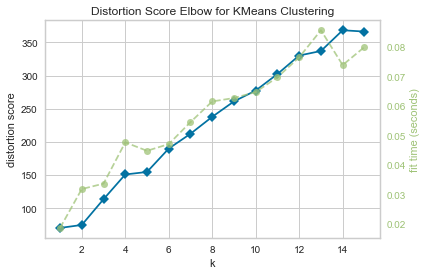

In [11]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,16))

visualizer.fit(breastcancer)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

The point of inflecton changes at the point where `k = 2`. We this come to an inference that the optimum number of clusters is 2!

# Data Variation

In [12]:
list(breastcancer.std())

[2.8157406585949305,
 3.0514591099541906,
 2.971912767215706,
 2.85537923921701,
 2.214299886649033,
 3.601851639804519,
 2.438364252324241,
 3.0536338936127545,
 1.7150779425067926]

In [13]:
breastcancer.describe()

,A2,A3,A4,A5,A6,A7,A8,A9,A10
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Text(0,0.5,'Value ranges')

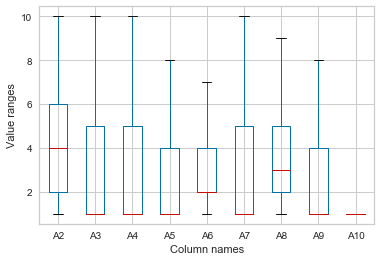

In [14]:
ax = breastcancer.plot(kind='box')
ax.set_xlabel('Column names')
ax.set_ylabel('Value ranges')

# A2, A3, A4, A5 and A7 have the highest standard deviations

In [15]:
breastcancer.describe()

,A2,A3,A4,A5,A6,A7,A8,A9,A10
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


# A7 has the highest standard deviation

# Implement normalization

In [16]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=2)
pipeline = Pipeline([('scale', scaler), ('kmeans', kmeans)])

In [17]:
pipeline.fit_transform(breastcancer)

/Users/abhishekbabuji/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/abhishekbabuji/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[4.6833168 , 0.8356056 ],
       [2.75320694, 3.80162497],
       [4.7528483 , 0.45915553],
       ...,
       [2.89571391, 6.06992073],
       [2.76281858, 4.67143527],
       [2.57168741, 4.95629874]])

In [18]:
print(pipeline.named_steps['kmeans'].inertia_)

2800.2124682101976


# Find centroids and print them

In [19]:
print(pipeline.named_steps['kmeans'].cluster_centers_)

[[ 0.98608331  1.20602021  1.19646478  1.02323341  1.01289215  1.1537572
   1.08838307  1.05475054  0.60362211]
 [-0.49622257 -0.60690049 -0.60209195 -0.51491746 -0.50971347 -0.5806004
  -0.54770245 -0.53077769 -0.30375822]]


# References

1. Elbow method: http://www.scikit-yb.org/en/latest/api/cluster/elbow.html